## 1. Load Library & Data

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1-1. Load Library

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

### 1-2. Load Data

In [106]:
city_data = pd.read_csv('/content/drive/MyDrive/SSK_한국연구재단(2023)/(소논문)온실가스 데이터와 연계한 지역간 제조업 자원배분 효율성 분석/data/manu_city_data.csv')
city_data

,id,year,c_city,city_id,c1,c2,c3,byear,empl_p,empl_p_m,...,pay3,cost_rent,fasset_b,fasset_e,invt_fuel_b,invt_fuel_e,invt_interm_b,invt_interm_e,reve,vadd
0,1,1999,11,1,C,10,9,1966.0,NaN,NaN,...,142.0,71.0,2253.0,2214.0,0.0,0.0,1937.0,1994.0,2679,413
1,2,1999,11,1,C,10,9,1972.0,NaN,NaN,...,101.0,0.0,58722.0,58713.0,22.0,15.0,725.0,722.0,4223,2321
2,3,1999,11,1,C,10,9,1984.0,NaN,NaN,...,35.0,222.0,306.0,295.0,0.0,0.0,736.0,561.0,3396,1807
3,4,1999,11,1,C,10,9,1997.0,NaN,NaN,...,15.0,160.0,199.0,137.0,0.0,0.0,92.0,4198.0,4532,3890
4,5,1999,11,1,D,15,0,1956.0,NaN,NaN,...,450.0,0.0,35556.0,34573.0,0.0,0.0,681.0,447.0,72606,48713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608691,608692,2019,26,7,C,34,9,2016.0,35.0,33.0,...,114.0,NaN,34.0,24.0,NaN,NaN,NaN,NaN,658,658
608692,608693,2019,26,7,C,34,9,2018.0,75.0,74.0,...,123.0,65.0,32.0,30.0,NaN,NaN,NaN,NaN,4500,4077
608693,608694,2019,26,7,C,34,9,2018.0,59.0,57.0,...,376.0,63.0,39.0,38.0,NaN,NaN,41.0,154.0,9883,5795
608694,608695,2019,26,7,C,34,9,2019.0,40.0,40.0,...,79.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1919,1335


In [107]:
city_data.describe()

,id,year,c_city,city_id,c2,c3,byear,empl_p,empl_p_m,empl_p_w,...,pay3,cost_rent,fasset_b,fasset_e,invt_fuel_b,invt_fuel_e,invt_interm_b,invt_interm_e,reve,vadd
count,608696.000000,608696.000000,608696.000000,608696.000000,608696.000000,608696.000000,608616.000000,216963.000000,215888.000000,213679.000000,...,608253.000000,601367.000000,6.058380e+05,6.073840e+05,5.355020e+05,5.353400e+05,5.916590e+05,5.916570e+05,6.086960e+05,6.086960e+05
mean,304348.500000,2006.361938,18.667377,2.698965,24.131082,3.014030,1996.351844,35.822292,26.947116,9.147146,...,108.472206,41.376474,3.230606e+03,3.166857e+03,1.302904e+02,1.409533e+02,8.917806e+02,9.554259e+02,9.756673e+03,3.055401e+03
std,175715.544065,5.849817,5.589076,1.686072,6.331869,2.907122,10.542211,262.339747,251.337934,28.497415,...,2217.164724,774.232493,6.229673e+04,6.113541e+04,5.564387e+03,5.888467e+03,2.091095e+04,2.167276e+04,2.654771e+05,6.531381e+04
min,1.000000,1999.000000,11.000000,1.000000,7.000000,0.000000,982.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.718000e+03,-1.098607e+06
25%,152174.750000,2002.000000,11.000000,1.000000,18.000000,1.000000,1991.000000,11.000000,7.000000,2.000000,...,5.000000,0.000000,3.500000e+01,3.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.600000e+02,1.900000e+02
50%,304348.500000,2005.000000,21.000000,2.000000,25.000000,2.000000,1998.000000,16.000000,11.000000,4.000000,...,18.000000,9.000000,1.660000e+02,1.680000e+02,0.000000e+00,0.000000e+00,1.500000e+01,1.900000e+01,1.029500e+03,4.790000e+02
75%,456522.250000,2011.000000,23.000000,4.000000,29.000000,4.000000,2002.000000,30.000000,21.000000,9.000000,...,55.000000,24.000000,9.860000e+02,9.930000e+02,3.000000e+00,3.000000e+00,1.360000e+02,1.660000e+02,3.073000e+03,1.284000e+03
max,608696.000000,2019.000000,26.000000,7.000000,37.000000,9.000000,2019.000000,29688.000000,29117.000000,2100.000000,...,395576.000000,256975.000000,9.752178e+06,9.209200e+06,1.516892e+06,1.662941e+06,4.617119e+06,4.600525e+06,4.690521e+07,9.866608e+06


In [108]:
city_mapping = {11:'서울',
                21:'부산',
                22:'대구',
                23:'인천',
                24:'광주',
                25:'대전',
                26:'울산'}
city_data['c_city'].replace(city_mapping, inplace=True)
city_data

,id,year,c_city,city_id,c1,c2,c3,byear,empl_p,empl_p_m,...,pay3,cost_rent,fasset_b,fasset_e,invt_fuel_b,invt_fuel_e,invt_interm_b,invt_interm_e,reve,vadd
0,1,1999,서울,1,C,10,9,1966.0,NaN,NaN,...,142.0,71.0,2253.0,2214.0,0.0,0.0,1937.0,1994.0,2679,413
1,2,1999,서울,1,C,10,9,1972.0,NaN,NaN,...,101.0,0.0,58722.0,58713.0,22.0,15.0,725.0,722.0,4223,2321
2,3,1999,서울,1,C,10,9,1984.0,NaN,NaN,...,35.0,222.0,306.0,295.0,0.0,0.0,736.0,561.0,3396,1807
3,4,1999,서울,1,C,10,9,1997.0,NaN,NaN,...,15.0,160.0,199.0,137.0,0.0,0.0,92.0,4198.0,4532,3890
4,5,1999,서울,1,D,15,0,1956.0,NaN,NaN,...,450.0,0.0,35556.0,34573.0,0.0,0.0,681.0,447.0,72606,48713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608691,608692,2019,울산,7,C,34,9,2016.0,35.0,33.0,...,114.0,NaN,34.0,24.0,NaN,NaN,NaN,NaN,658,658
608692,608693,2019,울산,7,C,34,9,2018.0,75.0,74.0,...,123.0,65.0,32.0,30.0,NaN,NaN,NaN,NaN,4500,4077
608693,608694,2019,울산,7,C,34,9,2018.0,59.0,57.0,...,376.0,63.0,39.0,38.0,NaN,NaN,41.0,154.0,9883,5795
608694,608695,2019,울산,7,C,34,9,2019.0,40.0,40.0,...,79.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1919,1335


### 1-3. data 명세

- Product function : Y = A * L^alpha * K^beta * E^(1-alpha-beta)
- Labor : pay1 + pay3
- Kapital : (fasset_b + fasset_e) / 2  
- Eenergy : cost_fuel + cost_elec
- Y(productivity) : vadd

In [109]:
city_data = city_data[['id','c1','c2','c3','year','c_city','pay1','pay3','fasset_b','fasset_e','cost_fuel','cost_elec','vadd']]
city_data

,id,c1,c2,c3,year,c_city,pay1,pay3,fasset_b,fasset_e,cost_fuel,cost_elec,vadd
0,1,C,10,9,1999,서울,748.0,142.0,2253.0,2214.0,12.0,30.0,413
1,2,C,10,9,1999,서울,782.0,101.0,58722.0,58713.0,14.0,65.0,2321
2,3,C,10,9,1999,서울,462.0,35.0,306.0,295.0,0.0,35.0,1807
3,4,C,10,9,1999,서울,451.0,15.0,199.0,137.0,38.0,22.0,3890
4,5,D,15,0,1999,서울,2620.0,450.0,35556.0,34573.0,170.0,227.0,48713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608691,608692,C,34,9,2019,울산,714.0,114.0,34.0,24.0,NaN,NaN,658
608692,608693,C,34,9,2019,울산,3037.0,123.0,32.0,30.0,NaN,8.0,4077
608693,608694,C,34,9,2019,울산,3321.0,376.0,39.0,38.0,0.0,0.0,5795
608694,608695,C,34,9,2019,울산,655.0,79.0,0.0,0.0,3.0,3.0,1335


## 2. Data Preprocessing

### 2-1. 결측치 제거

In [110]:
# 결측치가 있는 행 제거
city_data = city_data.dropna()
# 결측치 확인
city_data.isnull().sum()

id           0
c1           0
c2           0
c3           0
year         0
c_city       0
pay1         0
pay3         0
fasset_b     0
fasset_e     0
cost_fuel    0
cost_elec    0
vadd         0
dtype: int64

### 2-2. 변수 생성

In [111]:
city_data['Labor'] = city_data['pay1'] + city_data['pay3']
city_data['Kapital'] = (city_data['fasset_b'] + city_data['fasset_b']) / 2
city_data['Energy'] = city_data['cost_fuel'] + city_data['cost_elec']
city_data.describe()

<ipython-input-111-490847769594>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Labor'] = city_data['pay1'] + city_data['pay3']
<ipython-input-111-490847769594>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Kapital'] = (city_data['fasset_b'] + city_data['fasset_b']) / 2
<ipython-input-111-490847769594>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,id,c2,c3,year,pay1,pay3,fasset_b,fasset_e,cost_fuel,cost_elec,vadd,Labor,Kapital,Energy
count,585593.000000,585593.000000,585593.000000,585593.000000,5.855930e+05,585593.000000,5.855930e+05,5.855930e+05,5.855930e+05,585593.000000,5.855930e+05,5.855930e+05,5.855930e+05,5.855930e+05
mean,293914.705082,24.170818,3.011062,2005.921816,7.571606e+02,106.223288,3.142540e+03,3.079167e+03,1.069693e+02,113.967083,2.994248e+03,8.633839e+02,3.142540e+03,2.209364e+02
std,170894.099412,6.316915,2.908677,5.515188,1.456033e+04,2253.879267,6.319284e+04,6.210316e+04,6.083512e+03,2480.246500,6.649512e+04,1.665925e+04,6.319284e+04,7.664766e+03
min,1.000000,7.000000,0.000000,1999.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.098607e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,146399.000000,18.000000,1.000000,2002.000000,7.800000e+01,5.000000,3.400000e+01,3.600000e+01,0.000000e+00,2.000000,1.850000e+02,8.500000e+01,3.400000e+01,3.000000e+00
50%,292797.000000,25.000000,2.000000,2005.000000,1.860000e+02,17.000000,1.560000e+02,1.580000e+02,0.000000e+00,6.000000,4.560000e+02,2.060000e+02,1.560000e+02,8.000000e+00
75%,439195.000000,29.000000,4.000000,2009.000000,4.680000e+02,52.000000,9.080000e+02,9.150000e+02,2.000000e+00,23.000000,1.217000e+03,5.210000e+02,9.080000e+02,2.900000e+01
max,608695.000000,37.000000,9.000000,2019.000000,3.127699e+06,395576.000000,9.752178e+06,9.209200e+06,1.767757e+06,394481.000000,9.866608e+06,3.462158e+06,9.752178e+06,1.941598e+06


### 2-3. 실질 변수 변환
- 제조업 생산자물가지수 : 119.84
- 실질변수 = 명목변수 / 제조업 생산자물가지수

In [112]:
price_index = 119.84
city_data['Labor_real'] = city_data['Labor'] / price_index
city_data['Kapital_real'] = city_data['Kapital'] / price_index
city_data['Energy_real'] = city_data['Energy'] / price_index
city_data['productivity_real'] = city_data['vadd'] / price_index
city_data.describe()

<ipython-input-112-73a82903827b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Labor_real'] = city_data['Labor'] / price_index
<ipython-input-112-73a82903827b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Kapital_real'] = city_data['Kapital'] / price_index
<ipython-input-112-73a82903827b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,id,c2,c3,year,pay1,pay3,fasset_b,fasset_e,cost_fuel,cost_elec,vadd,Labor,Kapital,Energy,Labor_real,Kapital_real,Energy_real,productivity_real
count,585593.000000,585593.000000,585593.000000,585593.000000,5.855930e+05,585593.000000,5.855930e+05,5.855930e+05,5.855930e+05,585593.000000,5.855930e+05,5.855930e+05,5.855930e+05,5.855930e+05,585593.000000,585593.000000,585593.000000,585593.000000
mean,293914.705082,24.170818,3.011062,2005.921816,7.571606e+02,106.223288,3.142540e+03,3.079167e+03,1.069693e+02,113.967083,2.994248e+03,8.633839e+02,3.142540e+03,2.209364e+02,7.204472,26.222797,1.843595,24.985381
std,170894.099412,6.316915,2.908677,5.515188,1.456033e+04,2253.879267,6.319284e+04,6.210316e+04,6.083512e+03,2480.246500,6.649512e+04,1.665925e+04,6.319284e+04,7.664766e+03,139.012417,527.310117,63.958329,554.865825
min,1.000000,7.000000,0.000000,1999.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.098607e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-9167.281375
25%,146399.000000,18.000000,1.000000,2002.000000,7.800000e+01,5.000000,3.400000e+01,3.600000e+01,0.000000e+00,2.000000,1.850000e+02,8.500000e+01,3.400000e+01,3.000000e+00,0.709279,0.283712,0.025033,1.543725
50%,292797.000000,25.000000,2.000000,2005.000000,1.860000e+02,17.000000,1.560000e+02,1.580000e+02,0.000000e+00,6.000000,4.560000e+02,2.060000e+02,1.560000e+02,8.000000e+00,1.718959,1.301736,0.066756,3.805073
75%,439195.000000,29.000000,4.000000,2009.000000,4.680000e+02,52.000000,9.080000e+02,9.150000e+02,2.000000e+00,23.000000,1.217000e+03,5.210000e+02,9.080000e+02,2.900000e+01,4.347463,7.576769,0.241989,10.155207
max,608695.000000,37.000000,9.000000,2019.000000,3.127699e+06,395576.000000,9.752178e+06,9.209200e+06,1.767757e+06,394481.000000,9.866608e+06,3.462158e+06,9.752178e+06,1.941598e+06,28889.836449,81376.652203,16201.585447,82331.508678


### 2-4. 각 변수 값 / 2자릿수 기준 산업평균 값

In [113]:
# 산업코드(c2,c3) 분류의 가중평균 값(가중치 : 부가가치)
labor_weight_mean = city_data.groupby(['c2','c3']).apply(lambda x: (x['Labor_real'] * x['vadd']).sum() / x['vadd'].sum())
kapital_weight_mean = city_data.groupby(['c2','c3']).apply(lambda x: (x['Kapital_real'] * x['vadd']).sum() / x['vadd'].sum())
energy_weight_mean = city_data.groupby(['c2','c3']).apply(lambda x: (x['Energy_real'] * x['vadd']).sum() / x['vadd'].sum())
productivity_weight_mean = city_data.groupby(['c2','c3']).apply(lambda x: (x['productivity_real'] * x['vadd']).sum() / x['vadd'].sum())
print(productivity_weight_mean)

c2  c3
7   0      14.787239
    1      85.671517
    2     108.025940
    3     175.311866
10  0     548.068549
             ...    
36  3      33.752190
    4      38.075441
    5      11.405750
    9      74.880631
37  0      31.523639
Length: 179, dtype: float64


In [114]:
# 가중평균을 데이터프레임으로 변환
labor_weight_mean_df = labor_weight_mean.reset_index(name='labor_weight_mean')
kapital_weight_mean_df = kapital_weight_mean.reset_index(name='kapital_weight_mean')
energy_weight_mean_df = energy_weight_mean.reset_index(name='energy_weight_mean')
productivity_weight_mean_df = productivity_weight_mean.reset_index(name='productivity_weight_mean')
productivity_weight_mean_df

,c2,c3,productivity_weight_mean
0,7,0,14.787239
1,7,1,85.671517
2,7,2,108.025940
3,7,3,175.311866
4,10,0,548.068549
...,...,...,...
174,36,3,33.752190
175,36,4,38.075441
176,36,5,11.405750
177,36,9,74.880631


In [115]:
# 기존 데이터프레임에 'c2'와 'c3' 값을 기준으로 가중평균 값 병합
city_data =  city_data.merge(labor_weight_mean_df, on=['c2', 'c3'])
city_data =  city_data.merge(kapital_weight_mean_df, on=['c2', 'c3'])
city_data =  city_data.merge(energy_weight_mean_df, on=['c2', 'c3'])
city_data =  city_data.merge(productivity_weight_mean_df, on=['c2', 'c3'])
city_data

,id,c1,c2,c3,year,c_city,pay1,pay3,fasset_b,fasset_e,...,Kapital,Energy,Labor_real,Kapital_real,Energy_real,productivity_real,labor_weight_mean,kapital_weight_mean,energy_weight_mean,productivity_weight_mean
0,1,C,10,9,1999,서울,748.0,142.0,2253.0,2214.0,...,2253.0,42.0,7.426569,18.800067,0.350467,3.446262,32.890332,362.841369,15.977050,323.694616
1,2,C,10,9,1999,서울,782.0,101.0,58722.0,58713.0,...,58722.0,79.0,7.368158,490.003338,0.659212,19.367490,32.890332,362.841369,15.977050,323.694616
2,3,C,10,9,1999,서울,462.0,35.0,306.0,295.0,...,306.0,35.0,4.147196,2.553405,0.292056,15.078438,32.890332,362.841369,15.977050,323.694616
3,4,C,10,9,1999,서울,451.0,15.0,199.0,137.0,...,199.0,60.0,3.888518,1.660547,0.500668,32.459947,32.890332,362.841369,15.977050,323.694616
4,17487,C,10,9,1999,부산,88.0,1.0,27.0,25.0,...,27.0,26.0,0.742657,0.225300,0.216956,1.226636,32.890332,362.841369,15.977050,323.694616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585588,606907,B,7,1,2019,울산,1020.0,92.0,1676.0,2202.0,...,1676.0,172.0,9.279039,13.985314,1.435247,20.085113,13.403551,109.622352,4.425793,85.671517
585589,606908,B,7,1,2019,울산,1408.0,161.0,4180.0,4218.0,...,4180.0,1454.0,13.092457,34.879840,12.132844,47.488318,13.403551,109.622352,4.425793,85.671517
585590,606909,B,7,1,2019,울산,830.0,184.0,17325.0,15885.0,...,17325.0,235.0,8.461282,144.567757,1.960948,67.481642,13.403551,109.622352,4.425793,85.671517
585591,607195,C,20,5,2019,울산,2119.0,722.0,20785.0,10635.0,...,20785.0,1017.0,23.706609,173.439586,8.486315,253.996996,23.928048,175.890140,8.581277,260.461241


In [116]:
# 해당기업 값 / 산업코드 기준 가중평균 값
city_data['Labor_real_mean'] = city_data['Labor_real'] / city_data['labor_weight_mean']
city_data['Kapital_real_mean'] = city_data['Kapital_real'] / city_data['kapital_weight_mean']
city_data['Energy_real_mean'] = city_data['Energy_real'] / city_data['energy_weight_mean']
city_data['productivity_real_mean'] = city_data['productivity_real'] / city_data['productivity_weight_mean']

city_data[['productivity_real','productivity_weight_mean','productivity_real_mean']]

,productivity_real,productivity_weight_mean,productivity_real_mean
0,3.446262,323.694616,0.010647
1,19.367490,323.694616,0.059833
2,15.078438,323.694616,0.046582
3,32.459947,323.694616,0.100280
4,1.226636,323.694616,0.003789
...,...,...,...
585588,20.085113,85.671517,0.234443
585589,47.488318,85.671517,0.554307
585590,67.481642,85.671517,0.787679
585591,253.996996,260.461241,0.975182


### 2-5. log변환

In [117]:
# 마이너스 무한대 방지를 위해서 +1
city_data['Labor_real_mean_log'] = np.log(city_data['Labor_real_mean']+1)
city_data['Kapital_real_mean_log'] = np.log(city_data['Kapital_real_mean']+1)
city_data['Energy_real_mean_log'] = np.log(city_data['Energy_real_mean']+1)
city_data['productivity_real_mean_log'] = np.log(city_data['productivity_real_mean']+1)
city_data = city_data.dropna()
city_data

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,id,c1,c2,c3,year,c_city,pay1,pay3,fasset_b,fasset_e,...,energy_weight_mean,productivity_weight_mean,Labor_real_mean,Kapital_real_mean,Energy_real_mean,productivity_real_mean,Labor_real_mean_log,Kapital_real_mean_log,Energy_real_mean_log,productivity_real_mean_log
0,1,C,10,9,1999,서울,748.0,142.0,2253.0,2214.0,...,15.977050,323.694616,0.225798,0.051813,0.021936,0.010647,0.203592,0.050516,0.021699,0.010590
1,2,C,10,9,1999,서울,782.0,101.0,58722.0,58713.0,...,15.977050,323.694616,0.224022,1.350462,0.041260,0.059833,0.202142,0.854612,0.040431,0.058111
2,3,C,10,9,1999,서울,462.0,35.0,306.0,295.0,...,15.977050,323.694616,0.126092,0.007037,0.018280,0.046582,0.118753,0.007013,0.018115,0.045530
3,4,C,10,9,1999,서울,451.0,15.0,199.0,137.0,...,15.977050,323.694616,0.118227,0.004577,0.031337,0.100280,0.111744,0.004566,0.030856,0.095564
4,17487,C,10,9,1999,부산,88.0,1.0,27.0,25.0,...,15.977050,323.694616,0.022580,0.000621,0.013579,0.003789,0.022329,0.000621,0.013488,0.003782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585588,606907,B,7,1,2019,울산,1020.0,92.0,1676.0,2202.0,...,4.425793,85.671517,0.692282,0.127577,0.324292,0.234443,0.526078,0.120071,0.280878,0.210620
585589,606908,B,7,1,2019,울산,1408.0,161.0,4180.0,4218.0,...,4.425793,85.671517,0.976790,0.318182,2.741395,0.554307,0.681474,0.276253,1.319458,0.441030
585590,606909,B,7,1,2019,울산,830.0,184.0,17325.0,15885.0,...,4.425793,85.671517,0.631272,1.318780,0.443073,0.787679,0.489360,0.841041,0.366775,0.580918
585591,607195,C,20,5,2019,울산,2119.0,722.0,20785.0,10635.0,...,8.581277,260.461241,0.990746,0.986068,0.988934,0.975182,0.688509,0.686157,0.687599,0.680660


## 3. Regression Modeling

### 3-1. 행정지역 : 서울

In [160]:
city = '서울'
city_name = 'seoul'
city_data_seoul = city_data[city_data['c_city'] == city]
city_data_seoul

,id,c1,c2,c3,year,c_city,pay1,pay3,fasset_b,fasset_e,...,energy_weight_mean,productivity_weight_mean,Labor_real_mean,Kapital_real_mean,Energy_real_mean,productivity_real_mean,Labor_real_mean_log,Kapital_real_mean_log,Energy_real_mean_log,productivity_real_mean_log
0,1,C,10,9,1999,서울,748.0,142.0,2253.0,2214.0,...,15.977050,323.694616,0.225798,0.051813,0.021936,0.010647,0.203592,0.050516,0.021699,0.010590
1,2,C,10,9,1999,서울,782.0,101.0,58722.0,58713.0,...,15.977050,323.694616,0.224022,1.350462,0.041260,0.059833,0.202142,0.854612,0.040431,0.058111
2,3,C,10,9,1999,서울,462.0,35.0,306.0,295.0,...,15.977050,323.694616,0.126092,0.007037,0.018280,0.046582,0.118753,0.007013,0.018115,0.045530
3,4,C,10,9,1999,서울,451.0,15.0,199.0,137.0,...,15.977050,323.694616,0.118227,0.004577,0.031337,0.100280,0.111744,0.004566,0.030856,0.095564
14,42984,C,10,9,2000,서울,772.0,156.0,2114.0,2027.0,...,15.977050,323.694616,0.235439,0.048617,0.056406,0.020314,0.211426,0.047472,0.054873,0.020110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585509,528949,C,10,7,2016,서울,164.0,8.0,178.0,281.0,...,0.268443,49.250074,0.106228,0.043946,0.124339,0.005083,0.100956,0.043008,0.117195,0.005070
585510,549001,C,10,7,2017,서울,193.0,9.0,192.0,315.0,...,0.268443,49.250074,0.124756,0.047403,0.217593,0.011691,0.117566,0.046314,0.196876,0.011623
585513,588816,C,10,7,2019,서울,1356.0,297.0,2259.0,3455.0,...,0.268443,49.250074,1.020900,0.557724,0.186508,1.157379,0.703543,0.443226,0.171015,0.768894
585514,588818,C,10,7,2019,서울,1761.0,128.0,1943.0,1907.0,...,0.268443,49.250074,1.166655,0.479707,1.367725,1.169239,0.773185,0.391844,0.861930,0.774376


- OLS regression

In [175]:
# 종속변수 저장
target = city_data_seoul[['productivity_real_mean_log']]

# 독립변수 저장
x_data = city_data_seoul[['Labor_real_mean_log', 'Kapital_real_mean_log', 'Energy_real_mean_log']]

# 선형회귀분석을 위한 b0항(상수항) 추가
x_data_b0 = sm.add_constant(x_data, has_constant='add')

# 회귀모델 적합
model = sm.OLS(target, x_data_b0)
fitted_model = model.fit()

# OLS 결과 출력
print(fitted_model.summary())

                                OLS Regression Results                                
Dep. Variable:     productivity_real_mean_log   R-squared:                       0.753
Model:                                    OLS   Adj. R-squared:                  0.753
Method:                         Least Squares   F-statistic:                 2.024e+05
Date:                        Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                                04:38:22   Log-Likelihood:             2.8175e+05
No. Observations:                      198996   AIC:                        -5.635e+05
Df Residuals:                          198992   BIC:                        -5.635e+05
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [176]:
# residuals shiftward 적용
# 잔차항 계산
residuals = fitted_model.resid
# 잔차항의 최소값 계산
min_residual = min(residuals)
# 잔차항에 최소값만큼 더하기
residuals_shifted = residuals + abs(min_residual)
# 새로운 잔차항을 기존 결과에 할당
fitted_model.resid = residuals_shifted
params = fitted_model.params

# y_hat계산 : y_hat = beta0*X0 + beta1*X1 + beta2*X2 + beta3*X3
pred = np.dot(x_data_b0, params)
pred = pd.Series(pred)

- Residual Plot

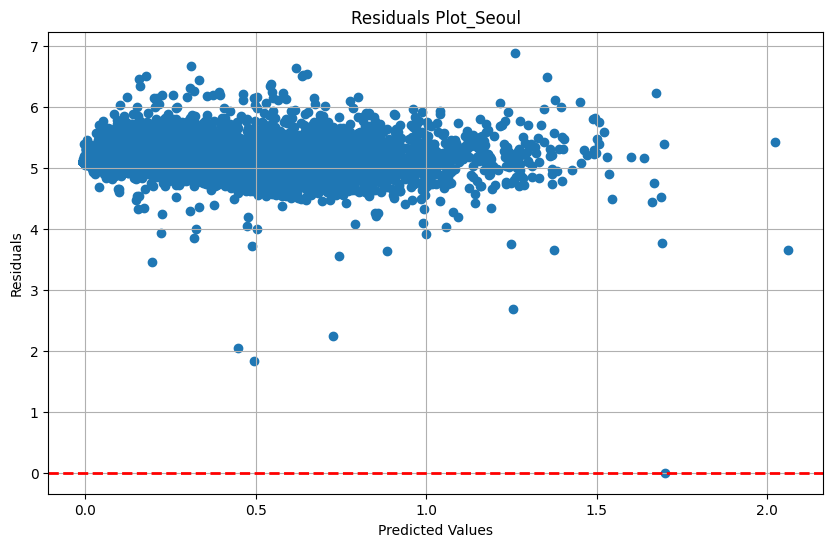

In [177]:
# 잔차 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals_shifted)
plt.axhline(y=0, color='red', linestyle='dashed', linewidth=2)
plt.title('Residuals Plot_Seoul')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

- 추정된 회귀직선을 통한 변수 간의 관계 시각화

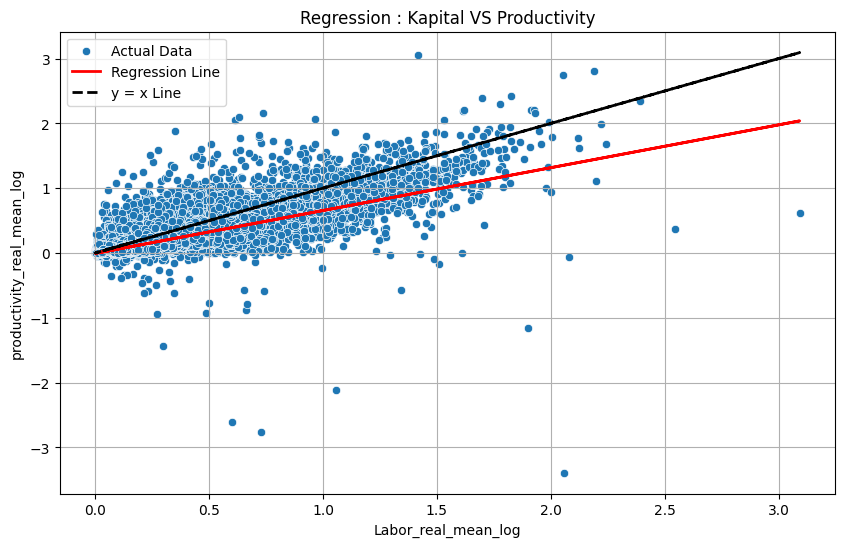

In [178]:
# 회귀분석 결과에서 추정된 회귀계수 추출
beta0, beta1 = fitted_model.params['const'], fitted_model.params['Labor_real_mean_log']

# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labor_real_mean_log', y='productivity_real_mean_log', data=city_data_seoul, label='Actual Data')
plt.plot(x_data['Labor_real_mean_log'], beta0 + beta1 * x_data['Labor_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Labor_real_mean_log'], x_data['Labor_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Regression : Kapital VS Productivity')
plt.xlabel('Labor_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()
plt.show()

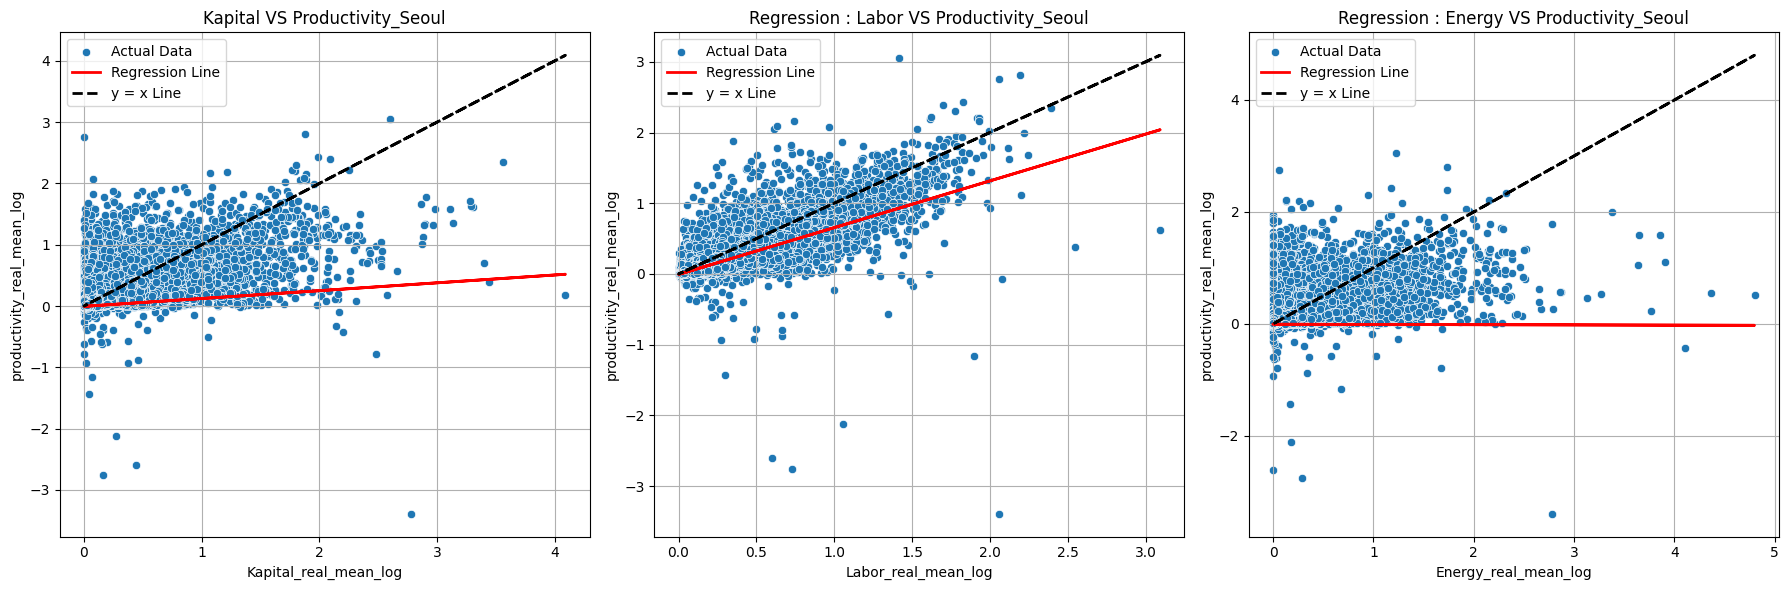

In [179]:
# 회귀분석 결과에서 추정된 회귀계수 추출
beta0_kapital, beta1_kapital = fitted_model.params['const'], fitted_model.params['Kapital_real_mean_log']
beta0_labor, beta1_labor = fitted_model.params['const'], fitted_model.params['Labor_real_mean_log']
beta0_energy, beta1_energy = fitted_model.params['const'], fitted_model.params['Energy_real_mean_log']

# 서브플롯 생성
plt.figure(figsize=(18, 6))

# 첫 번째 서브플롯: Kapital vs Productivity
plt.subplot(131)
sns.scatterplot(x='Kapital_real_mean_log', y='productivity_real_mean_log', data=city_data_seoul, label='Actual Data')
plt.plot(x_data['Kapital_real_mean_log'], beta0_kapital + beta1_kapital * x_data['Kapital_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Kapital_real_mean_log'], x_data['Kapital_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Kapital VS Productivity_Seoul')
plt.xlabel('Kapital_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 두 번째 서브플롯: Labor vs Productivity
plt.subplot(132)
sns.scatterplot(x='Labor_real_mean_log', y='productivity_real_mean_log', data=city_data_seoul, label='Actual Data')
plt.plot(x_data['Labor_real_mean_log'], beta0_labor + beta1_labor * x_data['Labor_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Labor_real_mean_log'], x_data['Labor_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Regression : Labor VS Productivity_Seoul')
plt.xlabel('Labor_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 세 번째 서브플롯: Energy vs Productivity
plt.subplot(133)
sns.scatterplot(x='Energy_real_mean_log', y='productivity_real_mean_log', data=city_data_seoul, label='Actual Data')
plt.plot(x_data['Energy_real_mean_log'], beta0_energy + beta1_energy * x_data['Energy_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Energy_real_mean_log'], x_data['Energy_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Regression : Energy VS Productivity_Seoul')
plt.xlabel('Energy_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 서브플롯 간 간격 조정 및 그래프 표시
plt.tight_layout()
plt.show()

- Robustness Check

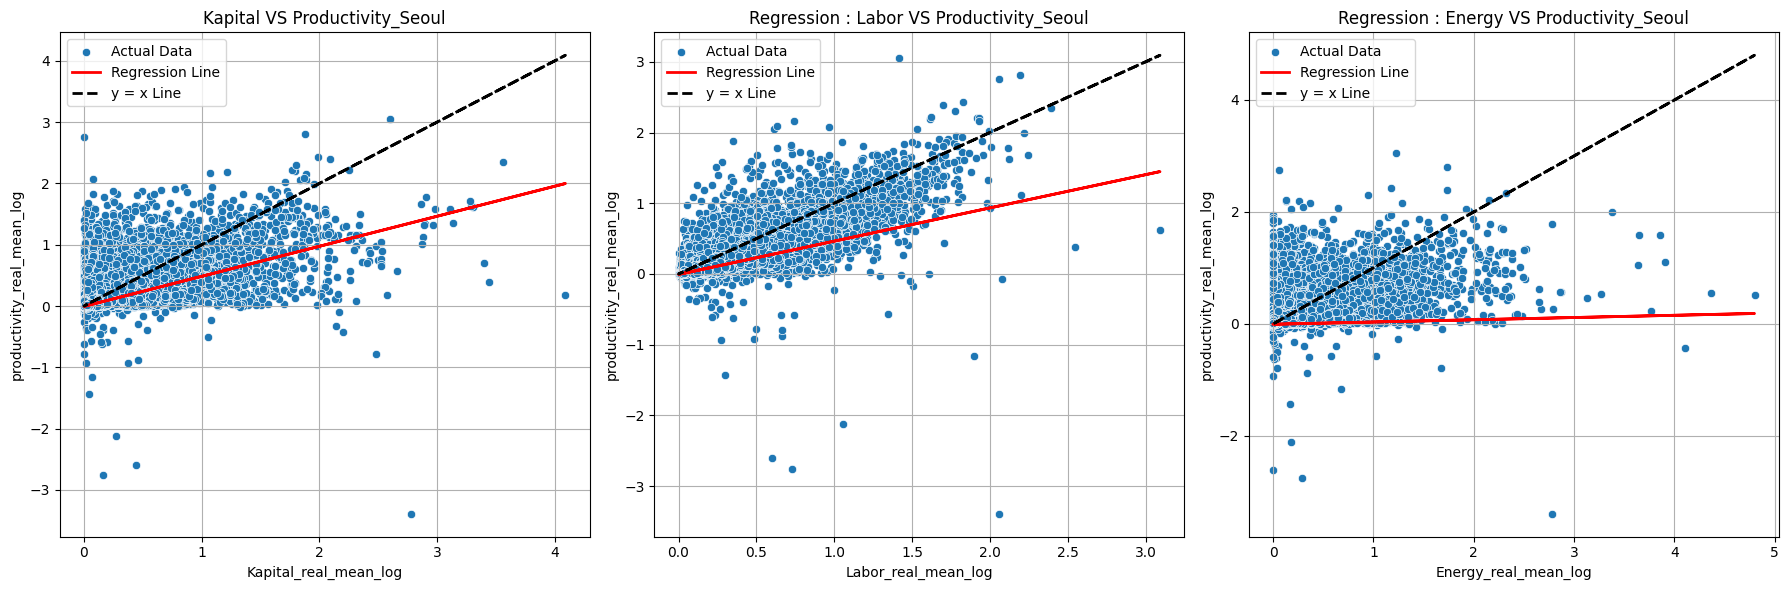

In [189]:
# 지정된 노동 비중, 자본 비중, 에너지 비중 사용

beta0_kapital, beta1_kapital = fitted_model.params['const'], 0.49
beta0_labor, beta1_labor = fitted_model.params['const'], 0.47
beta0_energy, beta1_energy = fitted_model.params['const'], 0.04

# 서브플롯 생성
plt.figure(figsize=(18, 6))

# 첫 번째 서브플롯: Kapital vs Productivity
plt.subplot(131)
sns.scatterplot(x='Kapital_real_mean_log', y='productivity_real_mean_log', data=city_data_seoul, label='Actual Data')
plt.plot(x_data['Kapital_real_mean_log'], beta0_kapital + beta1_kapital * x_data['Kapital_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Kapital_real_mean_log'], x_data['Kapital_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Kapital VS Productivity_Seoul')
plt.xlabel('Kapital_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 두 번째 서브플롯: Labor vs Productivity
plt.subplot(132)
sns.scatterplot(x='Labor_real_mean_log', y='productivity_real_mean_log', data=city_data_seoul, label='Actual Data')
plt.plot(x_data['Labor_real_mean_log'], beta0_labor + beta1_labor * x_data['Labor_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Labor_real_mean_log'], x_data['Labor_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Regression : Labor VS Productivity_Seoul')
plt.xlabel('Labor_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 세 번째 서브플롯: Energy vs Productivity
plt.subplot(133)
sns.scatterplot(x='Energy_real_mean_log', y='productivity_real_mean_log', data=city_data_seoul, label='Actual Data')
plt.plot(x_data['Energy_real_mean_log'], beta0_energy + beta1_energy * x_data['Energy_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Energy_real_mean_log'], x_data['Energy_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Regression : Energy VS Productivity_Seoul')
plt.xlabel('Energy_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 서브플롯 간 간격 조정 및 그래프 표시
plt.tight_layout()
plt.show()

### 3-2. 행정 지역 : 부산

In [164]:
city = '부산'
city_name = 'busan'
city_data_busan = city_data[city_data['c_city'] == city]

- OLS regression

In [165]:
# 종속변수 저장
target = city_data_busan[['productivity_real_mean_log']]

# 독립변수 저장
x_data = city_data_busan[['Labor_real_mean_log', 'Kapital_real_mean_log', 'Energy_real_mean_log']]

# 선형회귀분석을 위한 b0항(상수항) 추가
x_data_b0 = sm.add_constant(x_data, has_constant='add')

# 회귀모델 적합
model = sm.OLS(target, x_data_b0)
fitted_model = model.fit()

# OLS 결과 출력
print(fitted_model.summary())

                                OLS Regression Results                                
Dep. Variable:     productivity_real_mean_log   R-squared:                       0.805
Model:                                    OLS   Adj. R-squared:                  0.805
Method:                         Least Squares   F-statistic:                 1.566e+05
Date:                        Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                                04:24:36   Log-Likelihood:             1.6027e+05
No. Observations:                      113956   AIC:                        -3.205e+05
Df Residuals:                          113952   BIC:                        -3.205e+05
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [166]:
# residuals shiftward 적용

# 잔차항 계산
residuals = fitted_model.resid
# 잔차항의 최소값 계산
min_residual = min(residuals)
# 잔차항에 최소값만큼 더하기
residuals_shifted = residuals + abs(min_residual)
# 새로운 잔차항을 기존 결과에 할당
fitted_model.resid = residuals_shifted
params = fitted_model.params

# y_hat계산 : y_hat = beta0*X0 + beta1*X1 + beta2*X2 + beta3*X3
pred = np.dot(x_data_b0, params)
pred = pd.Series(pred)

- Residual Plot

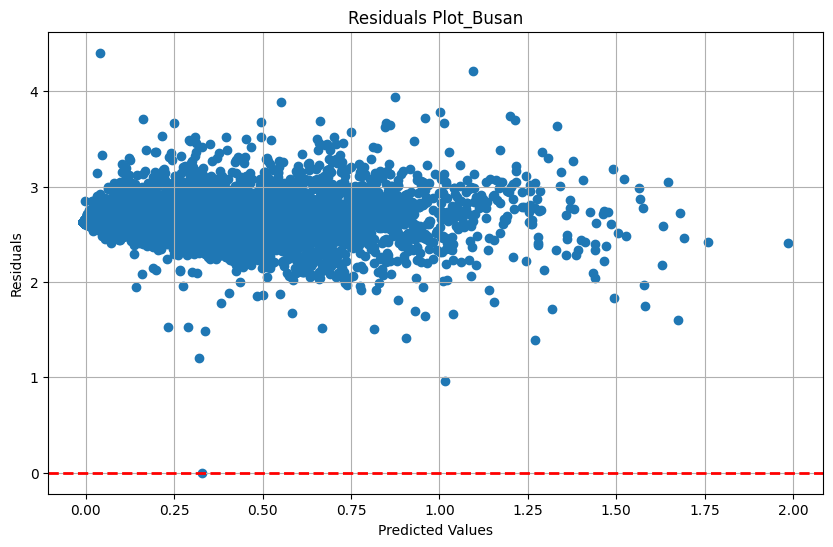

In [170]:
# 잔차 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals_shifted)
plt.axhline(y=0, color='red', linestyle='dashed', linewidth=2)
plt.title('Residuals Plot_Busan')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

- 추정된 회귀직선을 통한 변수 간의 관계 시각화

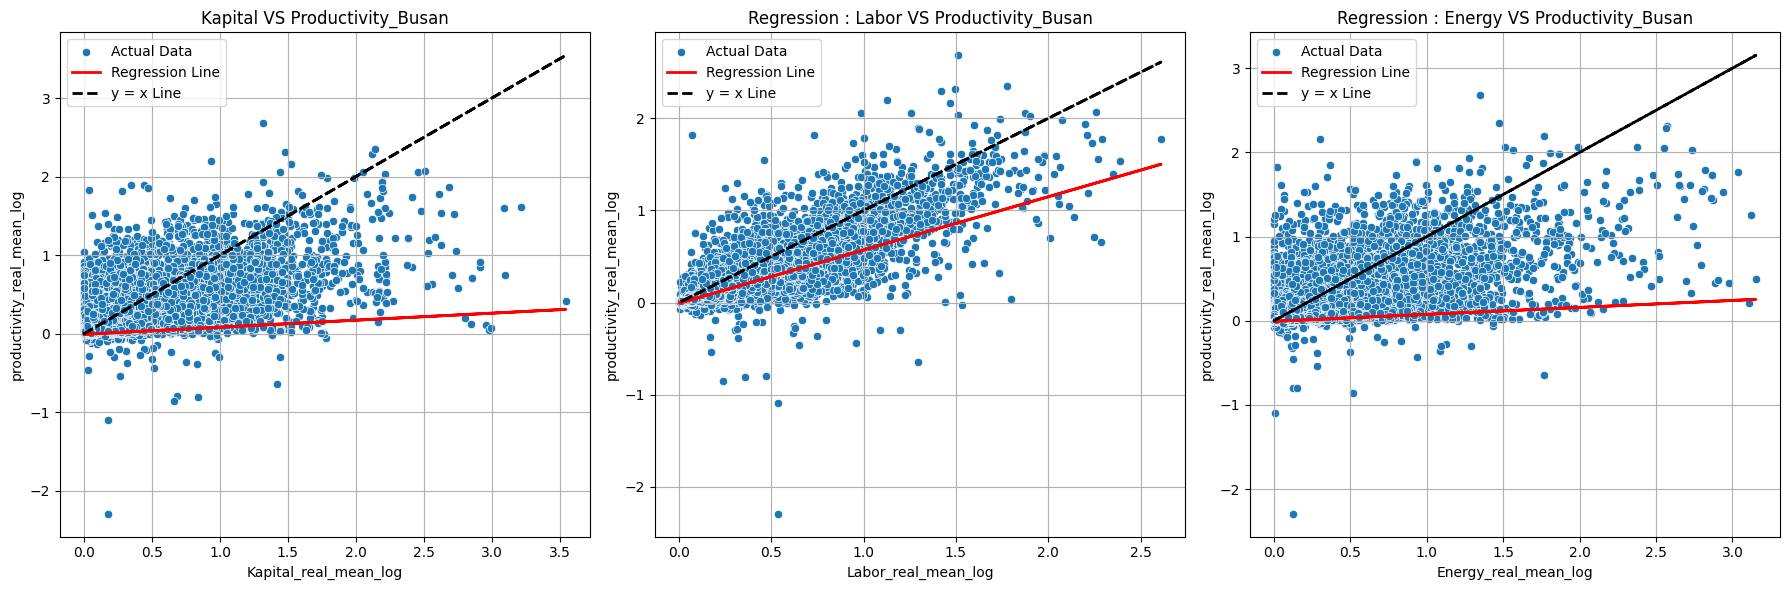

In [169]:
# 회귀분석 결과에서 추정된 회귀계수 추출
beta0_kapital, beta1_kapital = fitted_model.params['const'], fitted_model.params['Kapital_real_mean_log']
beta0_labor, beta1_labor = fitted_model.params['const'], fitted_model.params['Labor_real_mean_log']
beta0_energy, beta1_energy = fitted_model.params['const'], fitted_model.params['Energy_real_mean_log']

# 서브플롯 생성
plt.figure(figsize=(18, 6))

# 첫 번째 서브플롯: Kapital vs Productivity
plt.subplot(131)
sns.scatterplot(x='Kapital_real_mean_log', y='productivity_real_mean_log', data=city_data_busan, label='Actual Data')
plt.plot(x_data['Kapital_real_mean_log'], beta0_kapital + beta1_kapital * x_data['Kapital_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Kapital_real_mean_log'], x_data['Kapital_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Kapital VS Productivity_Busan')
plt.xlabel('Kapital_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 두 번째 서브플롯: Labor vs Productivity
plt.subplot(132)
sns.scatterplot(x='Labor_real_mean_log', y='productivity_real_mean_log', data=city_data_busan, label='Actual Data')
plt.plot(x_data['Labor_real_mean_log'], beta0_labor + beta1_labor * x_data['Labor_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Labor_real_mean_log'], x_data['Labor_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Regression : Labor VS Productivity_Busan')
plt.xlabel('Labor_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 세 번째 서브플롯: Energy vs Productivity
plt.subplot(133)
sns.scatterplot(x='Energy_real_mean_log', y='productivity_real_mean_log', data=city_data_busan, label='Actual Data')
plt.plot(x_data['Energy_real_mean_log'], beta0_energy + beta1_energy * x_data['Energy_real_mean_log'], color='red', linewidth=2, label='Regression Line')
plt.plot(x_data['Energy_real_mean_log'], x_data['Energy_real_mean_log'], color='black', linewidth=2, linestyle='dashed', label='y = x Line')
plt.title('Regression : Energy VS Productivity_Busan')
plt.xlabel('Energy_real_mean_log')
plt.ylabel('productivity_real_mean_log')
plt.legend()
plt.grid()

# 서브플롯 간 간격 조정 및 그래프 표시
plt.tight_layout()
plt.show()